# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [759]:
m = 1
A = 0.10#872627258300784#0.12872631072998048#9#0.001#0.049261572870865834#0.0495#0.04922733211517334#0.04926157287086606#0.049261573076248164#0.04925#55#0.05#0.049375#0.07#0.05#0.1124921875#0.125
run = 1

1

In [760]:
function compactify(r)
    return r/(1+r)
end

function uncompactify(x)
    return x/(1-x)
end

uncompactify (generic function with 1 method)

Choose your grid

In [761]:
global compactified=true
global loggrid=true

global bisection=false

false

In [762]:
using Quadmath, Printf

res=m;
N=2.0^m*400.0/2.0

if compactified==true
    Xf=1.0
else
    Xf=10.0#Float128(1.0);
end

dx=Xf/N#Float128(Xf/N);
if loggrid==false
    dt=0.5*round(dx,digits=10)#0.5*dx#round(dx,digits=10);#dx
else
    dt=0.1*round(dx,digits=10)
end
Nt=2.0^m*400.0/2.0
Tf=Nt*dt; #final time
#print(Tf)

In [763]:
print(N)

400.0

In [764]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

# Grid

In [765]:
using Printf
include("./ScalarField.jl");
#include("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/myspline.jl");

In [766]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
#initX1=create_range(ori,Xf,dx,N)
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)
#initX=create_range(ori-3.0*dx,Xf+3.0*dx,dx,N+6)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

"""if loggrid==true
    global originalX=initX
    xtilde=gridfunc(initX1)
    initX1=xtilde
    initX=collect(initX)
    initX[4:L-3]=xtilde
    #global dergrid_func = der_grid(initX)
end;""";

step size is  0.0025
the time step is 0.00025


# Initial data of m β Ψ and Ψ,x

In [767]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initpsi=zeros(L)
initderpsi=zeros(L)
#initm=Array{Float128}(undef, L)
#initbeta=Array{Float128}(undef, L)
#initpsi=Array{Float128}(undef, L)
#initderpsi=Array{Float128}(undef, L)

state_array=[initm initbeta initpsi initderpsi initX];

#PSI
r0=0.7#Float128(0.7)#0.01#0.7#0.01#0.7#0.7#0.7#0.01#0.7#0.3
sigma=0.3#Float128(0.3)


#PSI,X FROM PSI
initderpsi[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)


state_array[:,4] = initderpsi
state_array=ghost(state_array)

####
if loggrid==true
    derpsi_func = Spline1D(inverse(initX[4:L-3]), state_array[4:L-3,4],  k=4);
else
    derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);
end;

In [768]:
"""derpsi_func = Spline1D(inverse(initX[4:L-3]), state_array[4:L-3,4],  k=4);
eval1 = derpsi_func(inverse(initX1))

derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);
eval2 = derpsi_func(initX1)


plot([(initX1) initX1 initX1] , [eval1 eval2 state_array[4:L-3,4]])""";

In [769]:
#derpsi_func(state_array[:,5]); #doesnt output the quad precision
#coef=splinethree(state_array[4:L-3,5],state_array[4:L-3,4],state_array[4:L-3,5]);

In [770]:
#evalInterval(Float128.([0.1]),initX,coef,3);

In [771]:
y0=Float128.([0.0 0.0 0.0])

state_array[4:L-3,1:3] = n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:]);

state_array = ghost(state_array);

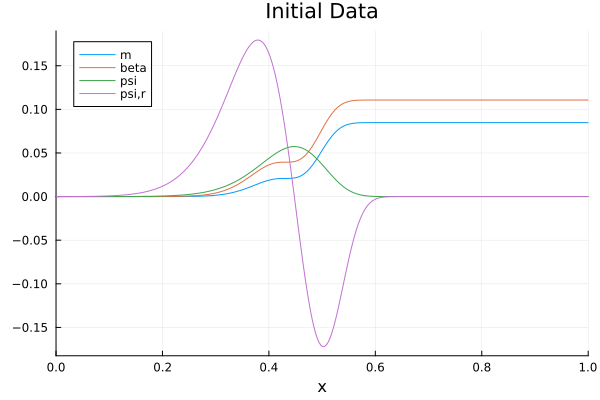

In [772]:
using Plots #showing initial data and the initial status of the horizon finder
plot(inverse.(initX[4:L-3]), state_array[4:L-3,1:4], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,r"],xlim=[0,1])

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [773]:
using Tables

global files=["m", "beta", "psi", "derpsi"]

print_muninn(files, 0, state_array[:,1:5],res,"w")

In [774]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

In [775]:
ginit=speed(initX,state_array[:,1],state_array[:,2])
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

3.3079557783497466


In [776]:
using Base.Threads
Threads.nthreads()

4

In [777]:
#global dt=5e-5

 ## Time evolution

fixed grid

In [778]:
finaltime=5.0
evol_stats, T_interp = timeevolution(state_array,finaltime,run);
#CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



iteration 500 dt is 1.0e-5, t=0.0049999999999999645 speed is 0.302301711615773, dx/dt=249.99999999999997


iteration 1000 dt is 1.0e-5, t=0.00999999999999976 speed is 0.3023019366261906, dx/dt=249.99999999999997


iteration 1500 dt is 1.0e-5, t=0.014999999999999557 speed is 0.3023021774453095, dx/dt=249.99999999999997


iteration 2000 dt is 1.0e-5, t=0.019999999999999355 speed is 0.3023024350481237, dx/dt=249.99999999999997


iteration 2500 dt is 1.0e-5, t=0.02499999999999915 speed is 0.3023027104629918, dx/dt=249.99999999999997


iteration 3000 dt is 1.0e-5, t=0.029999999999998948 speed is 0.30230300477440464, dx/dt=249.99999999999997


iteration 3500 dt is 1.0e-5, t=0.035000000000000045 speed is 0.3023033191259095, dx/dt=249.99999999999997


iteration 4000 dt is 1.0e-5, t=0.040000000000001576 speed is 0.3023036547231996, dx/dt=249.99999999999997


iteration 4500 dt is 1.0e-5, t=0.04500000000000311 speed is 0.30230401283738295, dx/dt=249.99999999999997


iteration 5000 dt is 1.0e-5,



iteration 38500 dt is 1.0e-5, t=0.38500000000024426 speed is 0.3026231422588381, dx/dt=249.99999999999997


iteration 39000 dt is 1.0e-5, t=0.39000000000024926 speed is 0.3026414877376365, dx/dt=249.99999999999997


iteration 39500 dt is 1.0e-5, t=0.39500000000025426 speed is 0.30266083213121114, dx/dt=249.99999999999997


iteration 40000 dt is 1.0e-5, t=0.40000000000025926 speed is 0.30268122705302974, dx/dt=249.99999999999997


iteration 40500 dt is 1.0e-5, t=0.40500000000026426 speed is 0.3027027265316921, dx/dt=249.99999999999997


iteration 41000 dt is 1.0e-5, t=0.41000000000026926 speed is 0.3027253871041799, dx/dt=249.99999999999997


iteration 41500 dt is 1.0e-5, t=0.41500000000027426 speed is 0.3027492679115377, dx/dt=249.99999999999997


iteration 42000 dt is 1.0e-5, t=0.42000000000027926 speed is 0.3027744307970012, dx/dt=249.99999999999997


iteration 42500 dt is 1.0e-5, t=0.42500000000028426 speed is 0.30280094040658767, dx/dt=249.99999999999997


iteration 43000 dt is 1



iteration 77000 dt is 1.0e-5, t=0.7699999999991305 speed is 0.31658014196034145, dx/dt=249.99999999999997


iteration 77500 dt is 1.0e-5, t=0.7749999999991077 speed is 0.3171912654746769, dx/dt=249.99999999999997


iteration 78000 dt is 1.0e-5, t=0.779999999999085 speed is 0.31782596270374325, dx/dt=249.99999999999997


iteration 78500 dt is 1.0e-5, t=0.7849999999990622 speed is 0.3184850689339063, dx/dt=249.99999999999997


iteration 79000 dt is 1.0e-5, t=0.7899999999990395 speed is 0.31916944966321953, dx/dt=249.99999999999997


iteration 79500 dt is 1.0e-5, t=0.7949999999990167 speed is 0.3198800019792905, dx/dt=249.99999999999997


iteration 80000 dt is 1.0e-5, t=0.799999999998994 speed is 0.3206176560199105, dx/dt=249.99999999999997


iteration 80500 dt is 1.0e-5, t=0.8049999999989712 speed is 0.32138337652199794, dx/dt=249.99999999999997


iteration 81000 dt is 1.0e-5, t=0.8099999999989485 speed is 0.3221781644647999, dx/dt=249.99999999999997


iteration 81500 dt is 1.0e-5, t=0



iteration 115500 dt is 1.0e-5, t=1.1549999999990992 speed is 0.6104376547771031, dx/dt=249.99999999999997


iteration 116000 dt is 1.0e-5, t=1.159999999999132 speed is 0.6240066563352039, dx/dt=249.99999999999997


iteration 116500 dt is 1.0e-5, t=1.1649999999991647 speed is 0.6381709185137449, dx/dt=249.99999999999997


iteration 117000 dt is 1.0e-5, t=1.1699999999991975 speed is 0.6529356528458086, dx/dt=249.99999999999997


iteration 117500 dt is 1.0e-5, t=1.1749999999992302 speed is 0.6682992164056067, dx/dt=249.99999999999997


iteration 118000 dt is 1.0e-5, t=1.179999999999263 speed is 0.6842512029163509, dx/dt=249.99999999999997


iteration 118500 dt is 1.0e-5, t=1.1849999999992957 speed is 0.7007702061208632, dx/dt=249.99999999999997


iteration 119000 dt is 1.0e-5, t=1.1899999999993285 speed is 0.7178212492992772, dx/dt=249.99999999999997


iteration 119500 dt is 1.0e-5, t=1.1949999999993612 speed is 0.7353529004255601, dx/dt=249.99999999999997


iteration 120000 dt is 1.0e-



iteration 154000 dt is 1.0e-5, t=1.5400000000016214 speed is 0.34921881374390545, dx/dt=249.99999999999997


iteration 154500 dt is 1.0e-5, t=1.5450000000016542 speed is 0.34603911797375697, dx/dt=249.99999999999997


iteration 155000 dt is 1.0e-5, t=1.550000000001687 speed is 0.34302954228164717, dx/dt=249.99999999999997


iteration 155500 dt is 1.0e-5, t=1.5550000000017197 speed is 0.3401843475409819, dx/dt=249.99999999999997


iteration 156000 dt is 1.0e-5, t=1.5600000000017524 speed is 0.33749821181030154, dx/dt=249.99999999999997


iteration 156500 dt is 1.0e-5, t=1.5650000000017852 speed is 0.3349662096910805, dx/dt=249.99999999999997


iteration 157000 dt is 1.0e-5, t=1.570000000001818 speed is 0.3325860919593848, dx/dt=249.99999999999997


iteration 157500 dt is 1.0e-5, t=1.5750000000018507 speed is 0.33035236808617363, dx/dt=249.99999999999997


iteration 158000 dt is 1.0e-5, t=1.5800000000018835 speed is 0.3282602670262455, dx/dt=249.99999999999997


iteration 158500 dt is 



iteration 192000 dt is 1.0e-5, t=1.9200000000041109 speed is 0.7717807572068585, dx/dt=249.99999999999997


iteration 192500 dt is 1.0e-5, t=1.9250000000041436 speed is 0.8174524187968897, dx/dt=249.99999999999997


iteration 193000 dt is 1.0e-5, t=1.9300000000041764 speed is 0.8687710057516, dx/dt=249.99999999999997


iteration 193500 dt is 1.0e-5, t=1.9350000000042091 speed is 0.9265082716745275, dx/dt=249.99999999999997


iteration 194000 dt is 1.0e-5, t=1.9400000000042419 speed is 0.9914673468257156, dx/dt=249.99999999999997


iteration 194500 dt is 1.0e-5, t=1.9450000000042746 speed is 1.0644111723403304, dx/dt=249.99999999999997


iteration 195000 dt is 1.0e-5, t=1.9500000000043074 speed is 1.1459296722725714, dx/dt=249.99999999999997


iteration 195500 dt is 1.0e-5, t=1.9550000000043402 speed is 1.236214184830008, dx/dt=249.99999999999997


iteration 196000 dt is 1.0e-5, t=1.960000000004373 speed is 1.334706654174943, dx/dt=249.99999999999997


iteration 196500 dt is 1.0e-5, t

#### 

 ## Movie of the evolution, apparent horizon formation for 0.0492<A*<0.04925

In [749]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 710:710
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    temp=round(n*dt,digits=2)
    plot!(initX1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"], title="$temp", ylim=[-0.01, 0.01],xlim=[0.0, 0.1])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/time_step710.csv" is not a valid file or doesn't exist

In [750]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 8000:100:10000
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot6=functions3.Column1[4:L-3] .* 2 .* (1 .- functions3.Column5[4:L-3]) ./functions3.Column5[4:L-3];
    
    
    plot!(initX1, plot6, labels=["monitor ratio"], ylim=[-1.3, 0.6],xlim=[0.0, 0.3])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/time_step8000.csv" is not a valid file or doesn't exist

In [751]:
dir

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

In [141]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 8200:5:8430
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/monitor_ratio$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
    
    plot!(initX1, [plot1], labels=["monitor ratio"], ylim=[0, 1],xlim=[0, 1])# |> display 
    #plot!(initX[4:L-3], [plot1], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 1500)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/monitor_ratio8200.csv" is not a valid file or doesn't exist

Sanity check for der func

In [207]:
array=init_gaussian(originalX,0.7,0.3,0.01)
arrayloggrid=init_gaussian(initX,0.7,0.3,0.01);

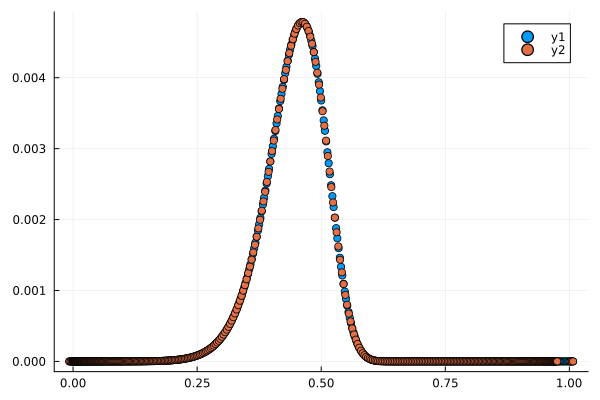

In [209]:
scatter([originalX, initX], [array, arrayloggrid])

In [210]:
aux=zeros(L)

loggrid=false
for i in 4:L-3
    aux[i]=Dertest(array,i,originalX)
end
x1=originalX
y1=aux


loggrid=true
for i in 4:L-3
    aux[i]=Dertest(arrayloggrid,i,initX)
end
x2=initX
y2=aux;

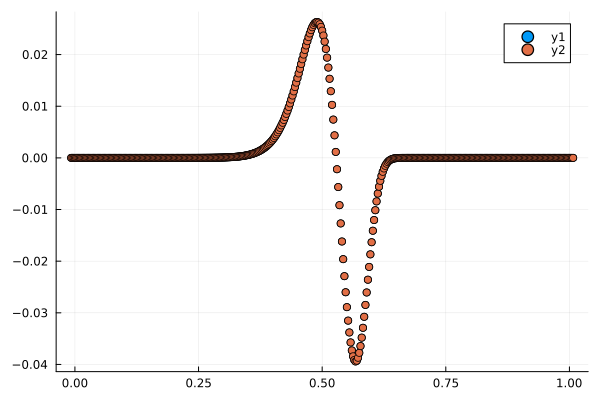

In [417]:
scatter([x1,x1],[y1,y2])